This code is using logistic regression to predict numbers from pictures.

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
%matplotlib inline
digits = load_digits()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.23, random_state=2)

In [6]:
x_train.shape

(1383, 64)

In [7]:
x_test.shape

(414, 64)

In [8]:
y_train.shape

(1383,)

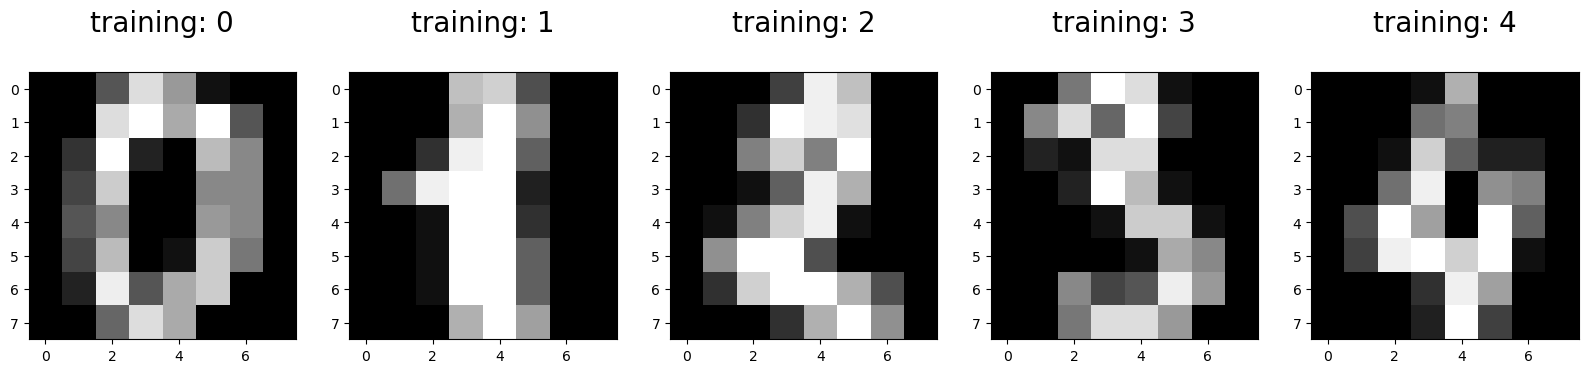

In [10]:
#Display images and numbers
plt.figure(figsize=(20,4));
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("training: %i\n" %label, fontsize=20)

In [12]:
 #Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\USER-22\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
score=logisticRegr.score(x_test,y_test)
score

0.9516908212560387

In [18]:
predictions = logisticRegr.predict(x_test)

In [19]:
cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

Text(0.5, 1.0, 'Acc score: 0.9516908212560387')

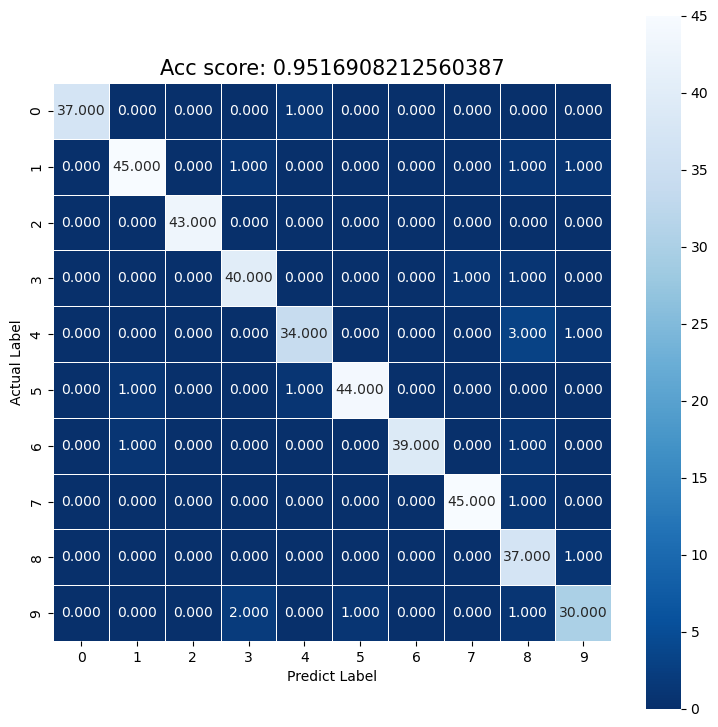

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True,cmap = 'Blues_r');
plt.ylabel("Actual Label")
plt.xlabel("Predict Label")
all_sample_title = 'Acc score: {0}'.format(score)
plt.title(all_sample_title,size=15)

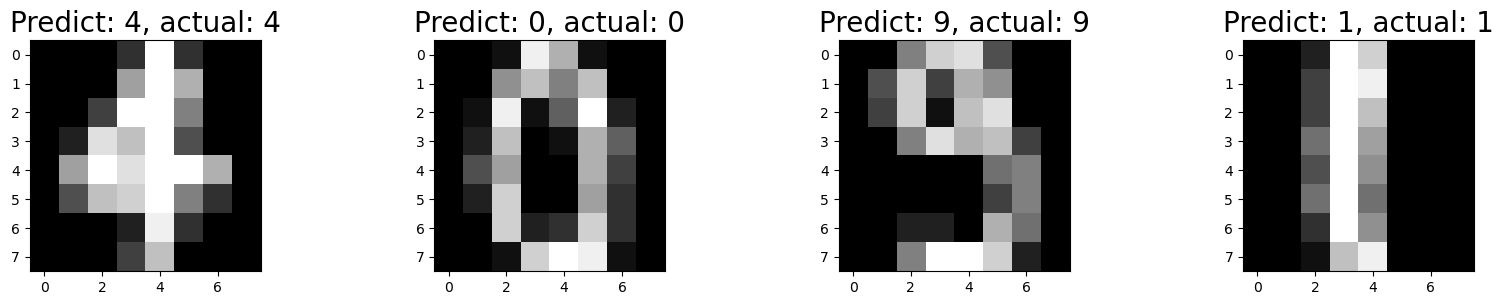

In [23]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions,y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3)) 
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predict: {}, actual: {}".format(predictions[wrong],y_test[wrong]),fontsize=20)